In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dataset-bbri-2022/BBRI.JK220322.csv
/kaggle/input/dataset-jkse-and-bbri-2022/JKSE220322.csv


***
# Overview
***

In this notebook, we are going to explore the BRI Stock rates, and JKSE (Jakarta Stock Exchange) , from Yahoo! Finance dataset,and we'll apply  Linear Regression model to see the effect of closing on BBRI in JKSE.

***
# Libraries
***

Import needed common libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

***
# Data Understanding
***

I used is JKSE and BBRI Stocks for 1 year (monthly) starting from March 2021 to March 2022 for the dataset, from Yahoo Finance
* [JKSE historical data stock march 2021 - march 2022](https://finance.yahoo.com/quote/%5EJKSE/history?p=%5EJKSE)
* [JKSE historical data stock march 2021 - march 2022](https://finance.yahoo.com/quote/BBRI.JK/history?p=BBRI.JK)


Read data. Between The Jakarta Composite Index and BBRI in one year

# JKSE Data Load

In [3]:
jkse = pd.read_csv('../input/dataset-jkse-and-bbri-2022/JKSE220322.csv')
jkse.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       13 non-null     object 
 1   Open       13 non-null     float64
 2   High       13 non-null     float64
 3   Low        13 non-null     float64
 4   Close      13 non-null     float64
 5   Adj Close  13 non-null     float64
 6   Volume     13 non-null     int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 856.0+ bytes


In [4]:
display(jkse)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-04-01,5988.022949,6115.620117,5883.523926,5995.616211,5995.616211,2813253600
1,2021-05-01,5999.661133,6005.087891,5742.038086,5947.462891,5947.462891,2453433400
2,2021-06-01,6002.480957,6134.881836,5884.917969,5985.488770,5985.488770,3980614000
3,2021-07-01,6001.121094,6166.305176,5947.618164,6070.039063,6070.039063,3225744000
4,2021-08-01,6098.007813,6263.539063,5938.407227,6150.298828,6150.298828,4218994600
5,2021-09-01,6157.820801,6286.942871,5982.766113,6286.942871,6286.942871,4359649400
6,2021-10-01,6269.237793,6687.133789,6202.905762,6591.346191,6591.346191,3960713500
7,2021-11-01,6618.122070,6754.463867,6480.009766,6533.932129,6533.932129,4188202600
8,2021-12-01,6544.517090,6688.378906,6484.578125,6581.481934,6581.481934,4373800600
9,2022-01-01,6586.259766,6738.109863,6523.929199,6631.150879,6631.150879,3713686800


In [5]:
print(jkse.shape)

(13, 7)


This means that our dataset has 13 rows and 7 columns.

In [6]:
print(jkse.info()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       13 non-null     object 
 1   Open       13 non-null     float64
 2   High       13 non-null     float64
 3   Low        13 non-null     float64
 4   Close      13 non-null     float64
 5   Adj Close  13 non-null     float64
 6   Volume     13 non-null     int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 856.0+ bytes
None


This means that our dataset has 13 rows and 1 columns.

# BBRI Data Load

In [7]:
bbri = pd.read_csv('../input/dataset-bbri-2022/BBRI.JK220322.csv')
bbri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       13 non-null     object 
 1   Open       13 non-null     float64
 2   High       13 non-null     float64
 3   Low        13 non-null     float64
 4   Close      13 non-null     float64
 5   Adj Close  13 non-null     float64
 6   Volume     13 non-null     int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 856.0+ bytes


In [8]:
display(bbri)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-04-01,4350.000000,4460.0,4050.000000,4050.000000,3812.179932,2752110600
1,2021-05-01,4060.000000,4280.0,3820.000000,4260.000000,4097.568359,2769409500
2,2021-06-01,4350.000000,4390.0,3860.000000,3940.000000,3789.770020,3325217700
3,2021-07-01,3940.000000,4030.0,3700.000000,3710.000000,3568.539795,2132270600
4,2021-08-01,3770.000000,4090.0,3481.758057,3572.665527,3436.441650,2290574201
5,2021-09-01,3572.665527,3880.0,3463.576416,3850.000000,3703.201660,6073477827
6,2021-10-01,3850.000000,4460.0,3830.000000,4250.000000,4087.949951,4745652300
7,2021-11-01,4330.000000,4340.0,4080.000000,4090.000000,3934.050537,2919948500
8,2021-12-01,4090.000000,4250.0,4050.000000,4110.000000,3953.288086,2371759500
9,2022-01-01,4120.000000,4240.0,4000.000000,4070.000000,3914.813232,2155349200


In [9]:
print(bbri.shape)

(13, 7)


In [10]:
print(jkse.info()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       13 non-null     object 
 1   Open       13 non-null     float64
 2   High       13 non-null     float64
 3   Low        13 non-null     float64
 4   Close      13 non-null     float64
 5   Adj Close  13 non-null     float64
 6   Volume     13 non-null     int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 856.0+ bytes
None


***
# Data Preparation
***

from each dataset, we will take 1 **closing** table / column on JKSE and BBRI to determine the independent and dependent variables

# JKSE Data Closing

In [11]:
jkse_closing = pd.read_csv('../input/dataset-jkse-and-bbri-2022/JKSE220322.csv', usecols =['Close'])
jkse = jkse_closing.rename(columns={'Close': 'JKSE'})
display(jkse)

,JKSE
0,5995.616211
1,5947.462891
2,5985.488770
3,6070.039063
4,6150.298828
5,6286.942871
6,6591.346191
7,6533.932129
8,6581.481934
9,6631.150879


# BBRI Data Closing

In [12]:
bbri_closing = pd.read_csv('../input/dataset-bbri-2022/BBRI.JK220322.csv', usecols =['Close'])
bbri = bbri_closing.rename(columns={'Close': 'BBRI'})
display(bbri)

,BBRI
0,4050.000000
1,4260.000000
2,3940.000000
3,3710.000000
4,3572.665527
5,3850.000000
6,4250.000000
7,4090.000000
8,4110.000000
9,4070.000000


# Merging Data 

Merge data JKSE and BBRI into 1 table

In [13]:
data = jkse.join(bbri)
display(data)

,JKSE,BBRI
0,5995.616211,4050.000000
1,5947.462891,4260.000000
2,5985.488770,3940.000000
3,6070.039063,3710.000000
4,6150.298828,3572.665527
5,6286.942871,3850.000000
6,6591.346191,4250.000000
7,6533.932129,4090.000000
8,6581.481934,4110.000000
9,6631.150879,4070.000000


In [14]:
print(data.shape)

(13, 2)


**Statistical Dataset**

In [15]:
data.describe()

,JKSE,BBRI
count,13.000000,13.000000
mean,6428.604643,4124.051194
std,377.348855,319.604139
min,5947.462891,3572.665527
25%,6070.039063,3940.000000
50%,6533.932129,4090.000000
75%,6631.150879,4260.000000
max,6954.964844,4580.000000


In [16]:
print(data.head())

          JKSE         BBRI
0  5995.616211  4050.000000
1  5947.462891  4260.000000
2  5985.488770  3940.000000
3  6070.039063  3710.000000
4  6150.298828  3572.665527


***
# Linear Regression
***

# Constanta and Coefficient

In [17]:
X = data['JKSE'].values
Y = data['BBRI'].values

In [18]:
#Mean X and Y
mean_x = np.mean(X)
mean_y = np.mean(Y)

#Total number of values
total_values = len(X)

#using the formula to calculate b1 and b2
# coefficient (b0) 
# constanta (b1)
numeric = 0
denom = 0
for i in range(total_values):
    numeric += (X[i] - mean_x) * (Y[i]- mean_y)
    denom += (X[i] - mean_x) ** 2
b1 = numeric/denom
b0 = mean_y - (b1 * mean_x)

#Print coefficients
print(b1,b0)

0.6253285009837307 104.06148984898755


# 2D Graph

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20.0 , 10.0)

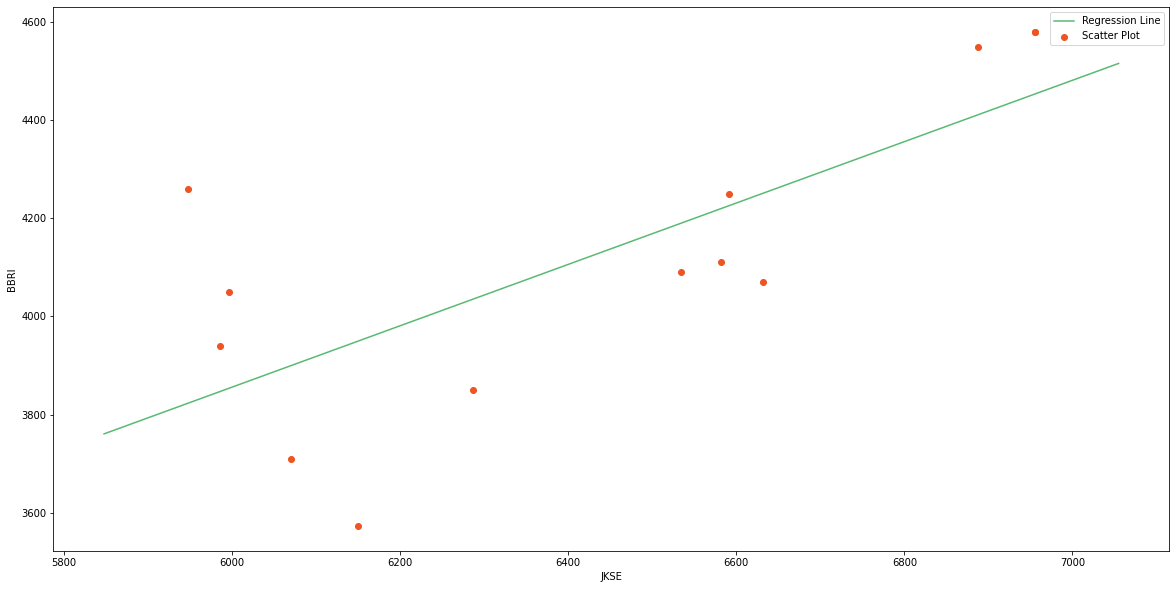

In [20]:
#ploting values and regression line
max_x = np.max(X) + 100
min_x = np.min(X) - 100

#calculating line values x and y
x = np.linspace(min_x, max_x, 100)
y = b0+b1*x

#ploting line
plt.plot(x,y, color='#58b970', label = 'Regression Line')

#ploting scatters points
plt.scatter(X,Y, c='#ef5423' , label ='Scatter Plot')

plt.xlabel('JKSE')
plt.ylabel('BBRI')
plt.legend()
plt.show()

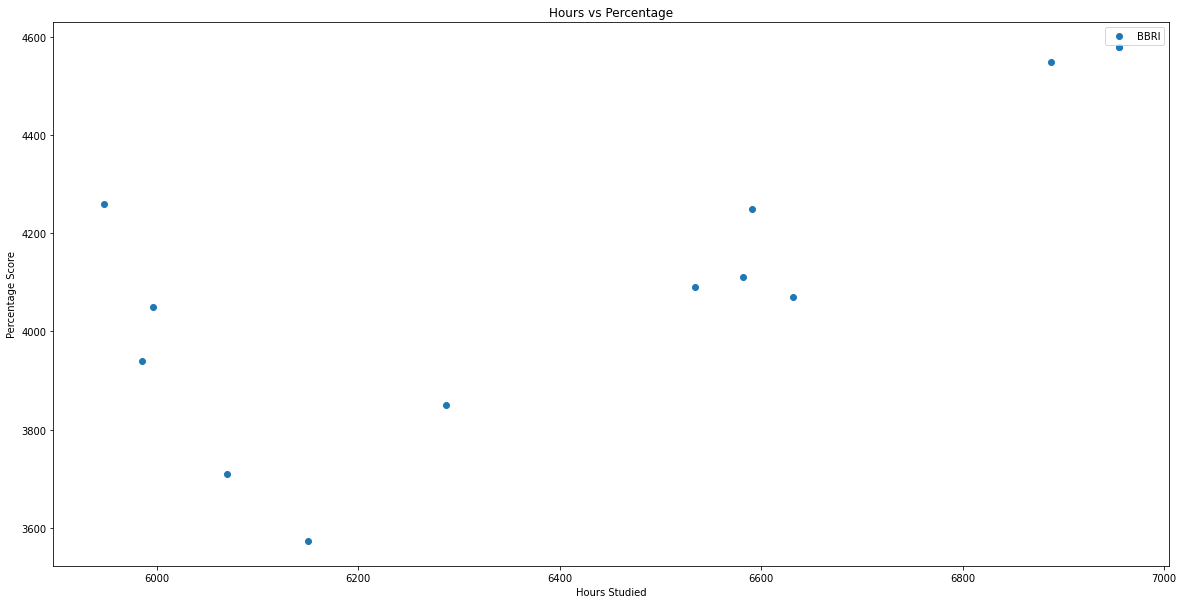

In [21]:
data.plot(x='JKSE', y='BBRI', style='o')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

From the graph above, we can see the influence of JKSE on the market from BBRI

# R-Squared

knowing how big the percentage of the model to the results

In [22]:
#ss_t = realitation value
#ss_r = prediction value
ss_t = 0
ss_r = 0
for i in range(total_values):
    y_pred = b0 + b1 * X[i]
    ss_t += (Y[i] - mean_y) ** 2
    ss_r += (Y[i] - y_pred) ** 2
r2 = 1 - (ss_r/ss_t)
print(r2)

0.5451019439622579


***
# Conclution
***

* BBRI stock exchange against JKSE produces a positive scatterplot
* JKSE contributes 55% to BBRI stock prediction